# Pre-trained Models

The purpose of this notebook is to build pre-trained models with VGG19 and Resnet50.

## Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from sklearn.metrics import confusion_matrix

import util as ut
from malig_data import * #Accessing Data

np.random.seed(123)

train_img shape (5421, 12288)
train_images shape (5421, 64, 64, 3)
train_labels shape (5421, 2)
test_img shape (1355, 12288)
test_images shape (1355, 64, 64, 3)
test_labels shape (1355, 2)
val_img shape (753, 12288)
val_images shape (753, 64, 64, 3)
val_labels shape (753, 2)
smote_img shape (9358, 12288)
smote_images shape (9358, 64, 64, 3)
smote_labels shape (9358,)
adasyn_img shape (9265, 12288)
adasyn_images shape (9265, 64, 64, 3)
adasyn_labels shape (9265,)
train_y shape (5421, 1)
test_y shape (1355, 1)
val_y shape (753, 1)


## VGG19 Pretrained Model

In [7]:
from tensorflow.keras.applications import VGG19
vgg19_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [8]:
model = models.Sequential()
model.add(vgg19_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
vgg19_base.trainable = False

In [12]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_images, test_y))

Epoch 1/50
170/170 [==============================] - 193s 1s/step - loss: 0.2596 - accuracy: 0.9046 - val_loss: 0.1903 - val_accuracy: 0.9269
Epoch 2/50
170/170 [==============================] - 190s 1s/step - loss: 0.2262 - accuracy: 0.9192 - val_loss: 0.1883 - val_accuracy: 0.9277
Epoch 3/50
170/170 [==============================] - 191s 1s/step - loss: 0.2148 - accuracy: 0.9233 - val_loss: 0.1753 - val_accuracy: 0.9336
Epoch 4/50
170/170 [==============================] - 205s 1s/step - loss: 0.2079 - accuracy: 0.9251 - val_loss: 0.1894 - val_accuracy: 0.9269
Epoch 5/50
170/170 [==============================] - 192s 1s/step - loss: 0.2034 - accuracy: 0.9271 - val_loss: 0.1947 - val_accuracy: 0.9277
Epoch 6/50
170/170 [==============================] - 188s 1s/step - loss: 0.1983 - accuracy: 0.9257 - val_loss: 0.1651 - val_accuracy: 0.9373
Epoch 7/50
170/170 [==============================] - 189s 1s/step - loss: 0.1902 - accuracy: 0.9290 - val_loss: 0.1654 - val_accuracy: 0.9343

In [14]:
filepath = '../models/vgg19.h5'
model.save(filepath)

In [15]:
results_train = model.evaluate(train_images, train_y)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = model.evaluate(val_images, val_y)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

170/170 [==============================] - 149s 879ms/step - loss: 0.1266 - accuracy: 0.9561
Training Loss: 0.127 
Training Accuracy: 0.956
----------
24/24 [==============================] - 20s 834ms/step - loss: 0.2386 - accuracy: 0.9363
Test Loss: 0.239 
Test Accuracy: 0.936


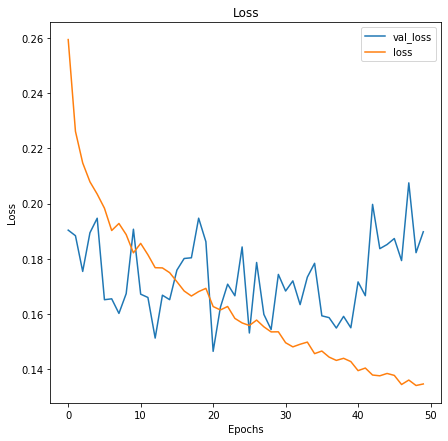

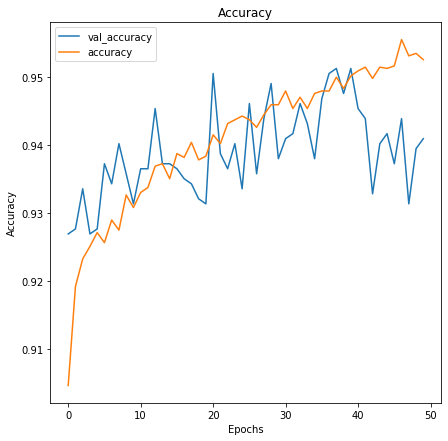

In [17]:
title = "../reports/VGG19 Model: Iteration of Loss Graph"
ut.training_results_Loss(history, title=title)
title = '../reports/VGG19 Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(history, title=title)

In [18]:
index=["Actual Malig", "Actual Benign"]
columns=["Predicted Malig", "Predicted Benign"]
predictions = model.predict_classes(val_images)
cm = confusion_matrix(val_y, predictions, labels=[0,1])
ut.cm_df(cm, index, columns)

W1218 20:24:46.437840 4503784896 deprecation.py:323] From <ipython-input-18-885a128926f3>:3: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,Predicted Malig,Predicted Benign
Actual Malig,77,44
Actual Benign,4,628


In [24]:
vgg19_adasyn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [25]:
vgg19_adasyn_base.trainable = False

In [26]:
vgg_adasyn_model = models.Sequential()
vgg_adasyn_model.add(vgg19_adasyn_base)
vgg_adasyn_model.add(layers.Flatten())
vgg_adasyn_model.add(layers.Dense(512, activation='relu'))
vgg_adasyn_model.add(layers.Dropout(0.5))
vgg_adasyn_model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
vgg_adasyn_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

vgg_adasyn_history = vgg_adasyn_model.fit(adasyn_images, adasyn_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_images, test_y))

Epoch 1/50
290/290 [==============================] - 304s 1s/step - loss: 0.3667 - accuracy: 0.8397 - val_loss: 0.2296 - val_accuracy: 0.9122
Epoch 2/50
290/290 [==============================] - 296s 1s/step - loss: 0.3061 - accuracy: 0.8682 - val_loss: 0.1782 - val_accuracy: 0.9343
Epoch 3/50
290/290 [==============================] - 296s 1s/step - loss: 0.2940 - accuracy: 0.8724 - val_loss: 0.1995 - val_accuracy: 0.9269
Epoch 4/50
290/290 [==============================] - 299s 1s/step - loss: 0.2786 - accuracy: 0.8835 - val_loss: 0.1717 - val_accuracy: 0.9373
Epoch 5/50
290/290 [==============================] - 296s 1s/step - loss: 0.2692 - accuracy: 0.8870 - val_loss: 0.1650 - val_accuracy: 0.9365
Epoch 6/50
290/290 [==============================] - 295s 1s/step - loss: 0.2595 - accuracy: 0.8922 - val_loss: 0.1754 - val_accuracy: 0.9358
Epoch 7/50
290/290 [==============================] - 576s 2s/step - loss: 0.2529 - accuracy: 0.8942 - val_loss: 0.1683 - val_accuracy: 0.9358

In [28]:
filepath = '../models/vgg19_adasyn.h5'
vgg_adasyn_model.save(filepath)

In [29]:
results_train = vgg_adasyn_model.evaluate(adasyn_images, adasyn_labels)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = vgg_adasyn_model.evaluate(val_images, val_y)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

290/290 [==============================] - 528s 2s/step - loss: 0.0844 - accuracy: 0.9704
Training Loss: 0.0844 
Training Accuracy: 0.97
----------
24/24 [==============================] - 41s 2s/step - loss: 0.2887 - accuracy: 0.9296
Test Loss: 0.289 
Test Accuracy: 0.93


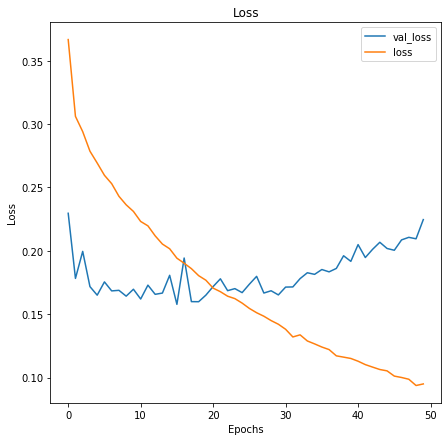

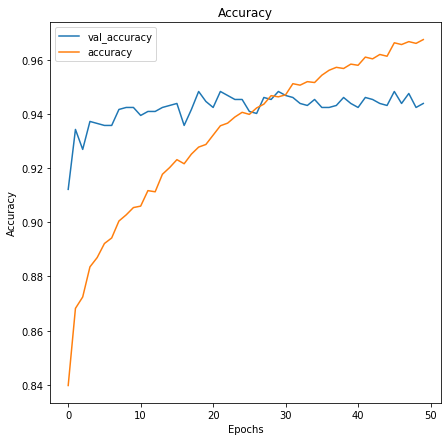

In [30]:
title = "../reports/VGG19_ADASYN Model: Iteration of Loss Graph"
ut.training_results_Loss(vgg_adasyn_history, title=title)
title = '../reports/VGG19_ADASYN Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(vgg_adasyn_history, title=title)

In [46]:
vgg_adasyn_predictions = vgg_adasyn_model.predict_classes(val_images)
vgg_adasyn_cm = confusion_matrix(val_y, vgg_adasyn_predictions, labels=[0,1])
ut.cm_df(vgg_adasyn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,79,42
Actual Benign,11,621


## ResNet50 Pretrained Model - Future Work

In [31]:
from tensorflow.keras.applications import ResNet50

ResNet50_base = ResNet50(weights='imagenet', 
                 include_top=False,
                 input_shape=(64, 64, 3))

In [32]:
ResNet50_base.trainable = False

In [33]:
resNet_model = models.Sequential()
resNet_model.add(ResNet50_base)
resNet_model.add(layers.Flatten())
resNet_model.add(layers.Dense(512, activation='relu'))
resNet_model.add(layers.Dropout(0.5))
resNet_model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
resNet_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

resNet_history = resNet_model.fit(train_images, train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_images, test_y))

Epoch 1/50
170/170 [==============================] - 168s 986ms/step - loss: 0.4007 - accuracy: 0.8648 - val_loss: 0.3602 - val_accuracy: 0.8716
Epoch 2/50
170/170 [==============================] - 168s 986ms/step - loss: 0.3640 - accuracy: 0.8735 - val_loss: 0.3411 - val_accuracy: 0.8760
Epoch 3/50
170/170 [==============================] - 171s 1s/step - loss: 0.3481 - accuracy: 0.8773 - val_loss: 0.3294 - val_accuracy: 0.8827
Epoch 4/50
170/170 [==============================] - 164s 962ms/step - loss: 0.3424 - accuracy: 0.8775 - val_loss: 0.3176 - val_accuracy: 0.8841
Epoch 5/50
170/170 [==============================] - 162s 954ms/step - loss: 0.3313 - accuracy: 0.8806 - val_loss: 0.3076 - val_accuracy: 0.8878
Epoch 6/50
170/170 [==============================] - 163s 957ms/step - loss: 0.3254 - accuracy: 0.8832 - val_loss: 0.2986 - val_accuracy: 0.8834
Epoch 7/50
170/170 [==============================] - 164s 963ms/step - loss: 0.3199 - accuracy: 0.8819 - val_loss: 0.2909 - va

In [35]:
filepath = '../models/ResNet50.h5'
resNet_model.save(filepath)

In [36]:
resNet_results_train = resNet_model.evaluate(train_images, train_y)
print(f'Training Loss: {resNet_results_train[0]:.3} \nTraining Accuracy: {resNet_results_train[1]:.3}')

print('----------')

resNet_results_test = resNet_model.evaluate(val_images, val_y)
print(f'Test Loss: {resNet_results_test[0]:.3} \nTest Accuracy: {resNet_results_test[1]:.3}')

170/170 [==============================] - 116s 683ms/step - loss: 0.2520 - accuracy: 0.9044
Training Loss: 0.252 
Training Accuracy: 0.904
----------
24/24 [==============================] - 16s 655ms/step - loss: 0.2517 - accuracy: 0.8964
Test Loss: 0.252 
Test Accuracy: 0.896


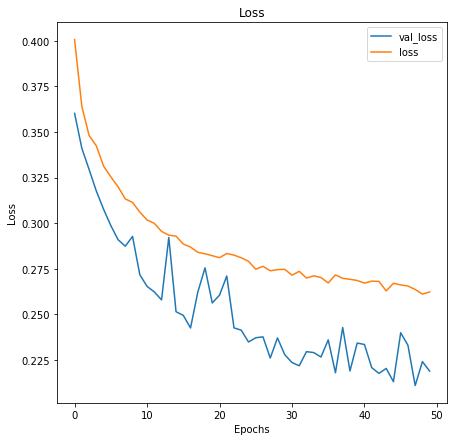

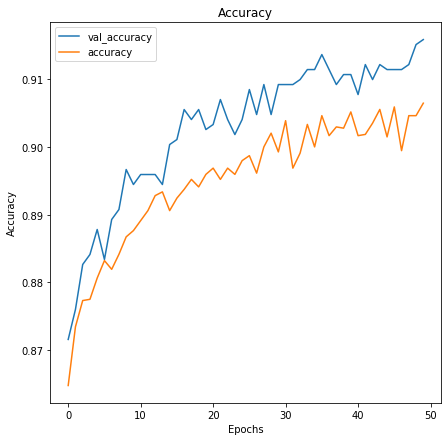

In [37]:
title = "../reports/ResNet50 Model: Iteration of Loss Graph"
ut.training_results_Loss(resNet_history, title=title)
title = '../reports/ResNet50 Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(resNet_history, title=title)

In [38]:
resNet_predictions = resNet_model.predict_classes(val_images)
resNet_cm = confusion_matrix(val_y, resNet_predictions, labels=[0,1])
ut.cm_df(resNet_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,54,67
Actual Benign,11,621


In [39]:
resNet_adasyn_model = models.Sequential()
resNet_adasyn_model.add(ResNet50_base)
resNet_adasyn_model.add(layers.Flatten())
resNet_adasyn_model.add(layers.Dense(512, activation='relu'))
resNet_adasyn_model.add(layers.Dropout(0.5))
resNet_adasyn_model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
resNet_adasyn_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

resNet_adasyn_history = resNet_adasyn_model.fit(adasyn_images, adasyn_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_images, test_y))

Epoch 1/50
290/290 [==============================] - 268s 924ms/step - loss: 0.6115 - accuracy: 0.6614 - val_loss: 0.5918 - val_accuracy: 0.7631
Epoch 2/50
290/290 [==============================] - 263s 908ms/step - loss: 0.5168 - accuracy: 0.7492 - val_loss: 0.5386 - val_accuracy: 0.8044
Epoch 3/50
290/290 [==============================] - 259s 892ms/step - loss: 0.4800 - accuracy: 0.7754 - val_loss: 0.4233 - val_accuracy: 0.8664
Epoch 4/50
290/290 [==============================] - 262s 904ms/step - loss: 0.4614 - accuracy: 0.7887 - val_loss: 0.6111 - val_accuracy: 0.7299
Epoch 5/50
290/290 [==============================] - 263s 907ms/step - loss: 0.4469 - accuracy: 0.7947 - val_loss: 0.3860 - val_accuracy: 0.8782
Epoch 6/50
290/290 [==============================] - 264s 911ms/step - loss: 0.4370 - accuracy: 0.7981 - val_loss: 0.4662 - val_accuracy: 0.8450
Epoch 7/50
290/290 [==============================] - 280s 967ms/step - loss: 0.4293 - accuracy: 0.8040 - val_loss: 0.3402 -

In [41]:
filepath = '../models/ResNet50 Adasyn.h5'
resNet_adasyn_model.save(filepath)

In [42]:
resNet_adasyn_results_train = resNet_adasyn_model.evaluate(adasyn_images, adasyn_labels)
print(f'Training Loss: {resNet_adasyn_results_train[0]:.3} \nTraining Accuracy: {resNet_adasyn_results_train[1]:.3}')

print('----------')

resNet_adasyn_results_test = resNet_adasyn_model.evaluate(val_images, val_y)
print(f'Test Loss: {resNet_adasyn_results_test[0]:.3} \nTest Accuracy: {resNet_adasyn_results_test[1]:.3}')

290/290 [==============================] - 90s 311ms/step - loss: 0.3501 - accuracy: 0.8507
Training Loss: 0.35 
Training Accuracy: 0.851
----------
24/24 [==============================] - 7s 309ms/step - loss: 0.3287 - accuracy: 0.8752
Test Loss: 0.329 
Test Accuracy: 0.875


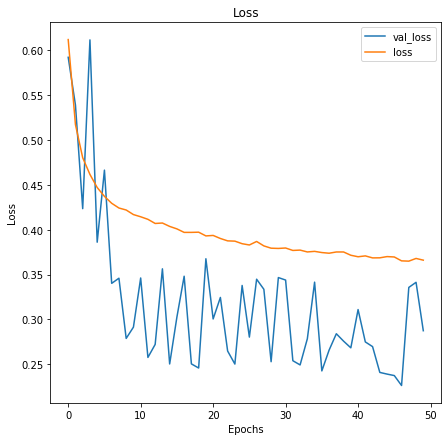

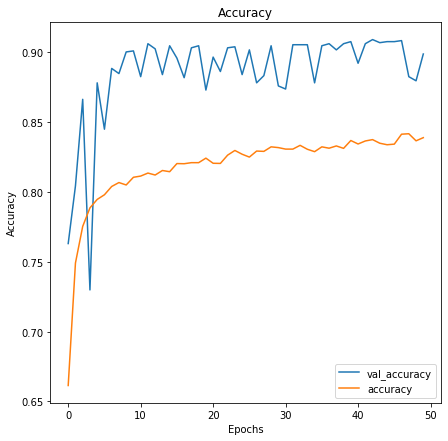

In [43]:
title = "../reports/ResNet50 Adasyn Model: Iteration of Loss Graph"
ut.training_results_Loss(resNet_adasyn_history, title=title)
title = '../reports/ResNet50 Adasyn Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(resNet_adasyn_history, title=title)

In [44]:
resNet_adasyn_predictions = resNet_adasyn_model.predict_classes(val_images)
resNet_adasyn_cm = confusion_matrix(val_y, resNet_adasyn_predictions, labels=[0,1])
ut.cm_df(resNet_adasyn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,90,31
Actual Benign,63,569


## Conclusion

The VGG19 pretrained models were over trained, but exhibited at 93% accuracy. The Resnet50 pretrained models were under trained. The Resnet50 models' accuracies could not go over 90%.

Overall pretrained model's performance was not as great compared to CNN models in both accuracy and time cost.

## Future Work

1. Find out the better parameter for the model.
2. Working with higher image quality (input shape).